In [ ]:
import os
import shutil

def copy_file_pairs(date, input_directory, output_directory):
    """
    Copies .jpg files and their corresponding .xml files from an input directory to an output directory based on a specified date.

    :param date: The date in the format YYYY-MM-DD to filter which files to copy.
    :param input_directory: The directory to copy files from.
    :param output_directory: The directory to copy files to.
    """
    # Iterate through all files in the input directory
    for filename in os.listdir(input_directory):
        # Check if the file is a JPG and its name starts with the specified date
        if filename.endswith('.jpg') and filename.startswith(date):
            # Construct the full path for both the current file and its XML pair
            jpg_file_path = os.path.join(input_directory, filename)
            xml_file_path = jpg_file_path.replace('.jpg', '.xml')
            
            # Check if the XML file exists
            if os.path.exists(xml_file_path):
                # Copy the JPG file to the output directory
                shutil.move(jpg_file_path, output_directory)
                print(f"Copied: {filename}")
                
                # Copy the corresponding XML file to the output directory
                xml_filename = os.path.basename(xml_file_path)
                shutil.move(xml_file_path, output_directory)
                print(f"Copied: {xml_filename}")
            else:
                print(f"XML file for {filename} does not exist. Skipping.")
        elif not filename.endswith('.jpg'):
            continue  # Skip non-JPG files
        else:
            continue  # Skip files that do not match the date

copy_file_pairs('2023-11-12', '/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/train', '/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/val')


In [12]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def parse_xml(directory_path):
    counts = {"kalb": 0, "person": 0}
    occurrences = {"kalb": {"single": 0, "multiple": 0}, "person": {"single": 0, "multiple": 0}}

    for filename in os.listdir(directory_path):
        if not filename.endswith('.xml'):
            continue

        path = os.path.join(directory_path, filename)
        tree = ET.parse(path)
        root = tree.getroot()

        temp_counts = {"kalb": 0, "person": 0}

        for obj in root.iter('object'):
            name = obj.find('name').text
            if name in ["kalb", "person"]:
                counts[name] += 1
                temp_counts[name] += 1

        for key in temp_counts:
            if temp_counts[key] == 1:
                occurrences[key]["single"] += 1
            elif temp_counts[key] > 1:
                occurrences[key]["multiple"] += 1

    return counts, occurrences

def plot_graphs(counts, occurrences, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext):
    # Graph 1: Number of Kalbs vs Persons
    plt.figure(figsize=(10, 6))
    objects = list(counts.keys())
    performance = list(counts.values())
    colors = ['#8C9FB1', '#04316A']
    bars = plt.bar(objects, performance, color=colors)
    plt.xlabel('Objects')
    plt.ylabel('Count')
    plt.title(graph_1_title)
    for bar, value, color in zip(bars, performance, colors):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom', color='#005287')
    plt.savefig(os.path.join(output_directory, graph_1_ext))
    plt.show()

    # Graph 2: Multiple Occurrence vs Single Occurrence for Each Kalb and Person
    plt.figure(figsize=(10, 6))
    categories = ['Single Kalb', 'Multiple Kalbs', 'Single Person', 'Multiple Persons']
    values = [occurrences['kalb']['single'], occurrences['kalb']['multiple'], occurrences['person']['single'], occurrences['person']['multiple']]
    color_patterns = ['#8C9FB1', '#8C9FB1', '#04316A', '#04316A']
    bars = plt.bar(categories, values, color=color_patterns)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(graph_2_title)
    for bar, value, color in zip(bars, values, color_patterns):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom', color='#005287')
    plt.savefig(os.path.join(output_directory, graph_2_ext))
    plt.show()


def main(directory_path, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext):
    counts, occurrences = parse_xml(directory_path)
    plot_graphs(counts, occurrences, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext)

# Example usage
# directory_path = 'path/to/your/xml/files'
# output_directory = 'path/to/save/graphs'
# main(directory_path, output_directory)





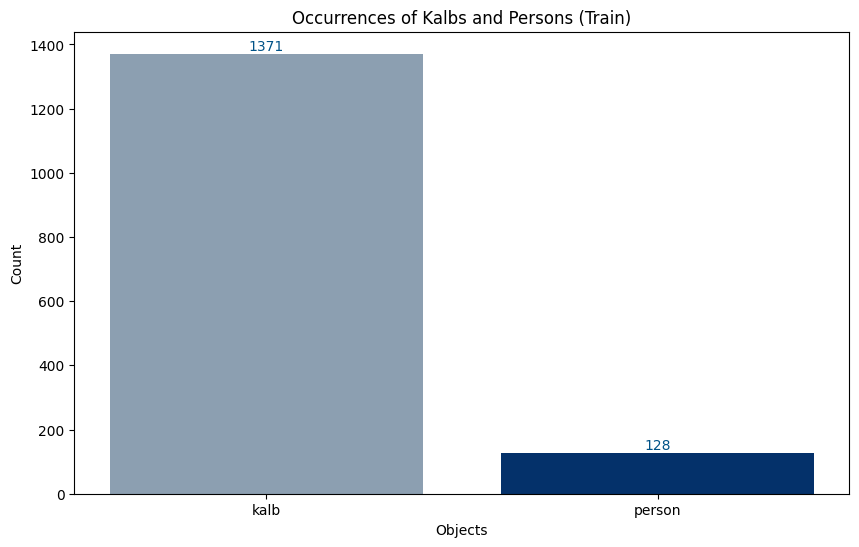

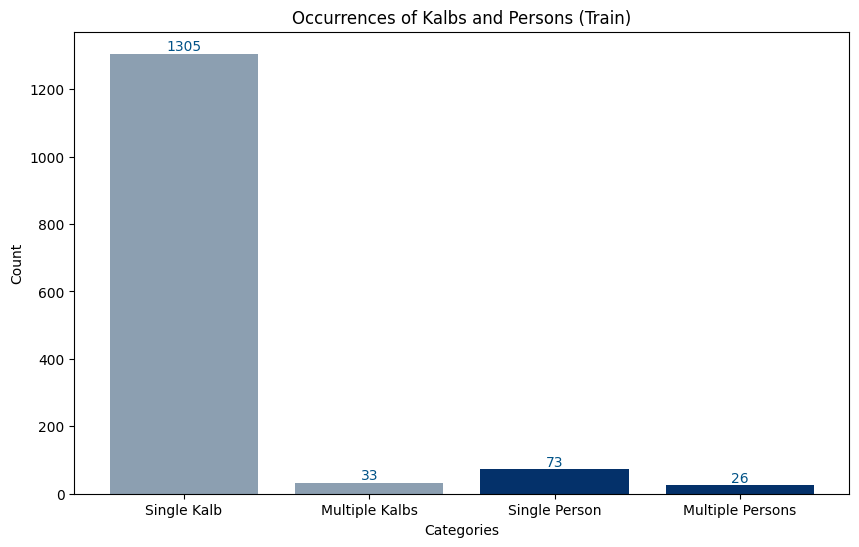

In [13]:
# Train
main('/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/train',
     '/home/woody/iwso/iwso122h/Calf_Detection/data_graphs',
     graph_1_title="Occurrences of Kalbs and Persons (Train)",
     graph_1_ext="graph_1_train.jpg",
     graph_2_title="Occurrences of Kalbs and Persons (Train)",
     graph_2_ext="graph_2_train.jpg"
     )


In [ ]:
# Test
main('/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/test',
     '/home/woody/iwso/iwso122h/Calf_Detection/data_graphs',
     graph_1_title="Occurrences of Kalbs and Persons (Test)",
     graph_1_ext="graph_1_test.jpg",
     graph_2_title="Occurrences of Kalbs and Persons (Test)",
     graph_2_ext="graph_2_test.jpg"
     )
